In [1]:
# Author: Brandon Botzer
# Date: 2/03/2024
# Class: Penn State - AI 879

Q1.
Modify the SURF feature matching algorithm to match Harris corners.  Apply the Harris, SURF, and ORB to the three Penn State images and compare the feature matching results.

Show and discuss the result.

(The three images are: L01 greatvalley.jpg  L07 greatvalley1.jpg  and L07 greatvalley2.jpg )

In [2]:
# Imports for functions

# The scikit-image package provides a wide variety of filter applications
#  which reduce the need to write out the corr / conv matricies

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

cv.__version__, ski.__version__

('4.8.1', '0.22.0')

In [3]:
# Read in files

# Grayscale file
gv = ski.io.imread('L01 greatvalley.jpg')

# RGB files
gv1 = ski.io.imread('L07 greatvalley1.jpg')
gv2 = ski.io.imread('L07 greatvalley2.jpg')

In [4]:
# Get the shapes as this may prove usefull later
print(f'gv Shape:  {gv.shape}\ngv1 Shape: {gv1.shape}\ngv2 Shape: {gv2.shape}')

gv Shape:  (3456, 2415)
gv1 Shape: (450, 800, 3)
gv2 Shape: (800, 1200, 3)


# Attempt at the Harris Corner Detection with Matching

In [5]:
# Attempt at Harris

# Convert to grayscale for the rgb images
gv1_g = ski.color.rgb2gray(gv1)
gv2_g = ski.color.rgb2gray(gv2)

# Transforms on the images
gv_t = ski.transform.rotate(gv, -20, resize=True)
gv_t = ski.transform.rescale(gv_t, 0.7)

gv1_g_t = ski.transform.rotate(gv1_g, -20, resize=True)
gv1_g_t = ski.transform.rescale(gv1_g_t, 0.7)

gv2_g_t = ski.transform.rotate(gv2_g, -20, resize=True)
gv2_g_t = ski.transform.rescale(gv2_g_t, 0.7)



In [6]:
# Using skimage functions
def applyHarris(im1, im2, title=''):
    '''
    Apply the Harris corner dector to an image and the same image that has been transformed.
    These found points are then matched between the two images and the matches are plotted

    Args:
        im1: The first image

        im2: The second image which will be compared to the first.

        title: plot title

    Returns:

        None

    '''
    # Change a color image to grayscale
    if len(im1.shape) > 2:
        im1 = ski.color.rgb2gray(im1)
    if len(im2.shape) > 2:
        im2 = ski.color.rgb2gray(im2)


    # Find the coordinates of the Harris corners in each image
        # The corner peaks sets a minimal distance threshold for the points to reduce clumping of points in high contrast regions
    coords1 = ski.feature.corner_peaks(ski.feature.corner_harris(im1), min_distance=5, threshold_rel=0.1)
    sub_coords1 = ski.feature.corner_subpix(im1, coords1)
    coords2 = ski.feature.corner_peaks(ski.feature.corner_harris(im2), min_distance=5, threshold_rel=0.1)
    sub_coords2 = ski.feature.corner_subpix(im2, coords2)

    # Match the feature peaks from each image
    matches = ski.feature.match_descriptors(coords1, coords2, cross_check=True)

    # Using the subpixel setup does not provide promising results
    # matches = ski.feature.match_descriptors(sub_coords1, sub_coords2, cross_check=True)

    # Plot the two images with their matched peaks
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.gray()
    plt.title(title)
    ski.feature.plot_matches(ax, im1, im2, coords1, coords2, matches)



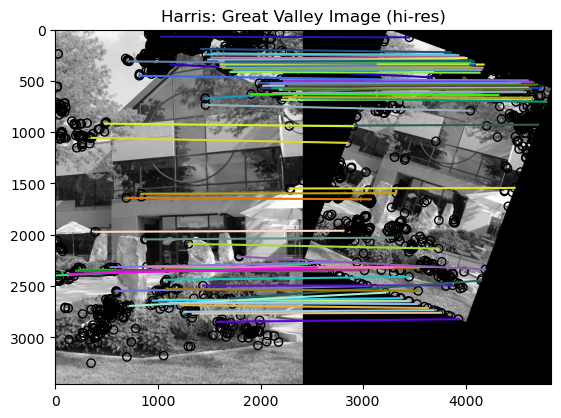

In [7]:
# Harris for the greatvalley image
applyHarris(gv, gv_t, 'Harris: Great Valley Image (hi-res)')

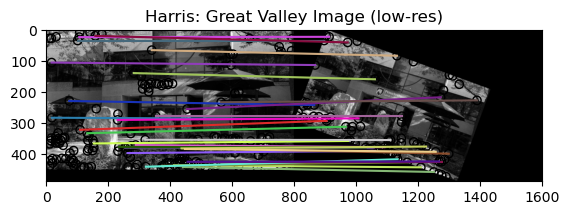

In [8]:
# Harris for the greatvalley 1 image
applyHarris(gv1, gv1_g_t, 'Harris: Great Valley Image (low-res)')

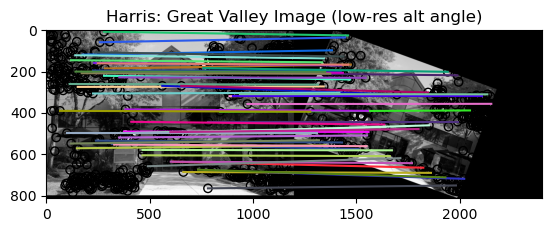

In [9]:
# Harris for the greatvalley 2 image
applyHarris(gv2, gv2_g_t, 'Harris: Great Valley Image (low-res alt angle)')

# Apply the ORB Feature Extractor

In [10]:
# Using skimage functions
def applyORB(im1, im2, title=''):

    '''
    Apply the ORB Feature Extractor to an image and the same image that has been transformed.
    These found points are then matched between the two images and the matches are plotted.

    Args:
        im1: The first image

        im2: The second image which will be compared to the first.

        title: plot title

    Returns:

        None

    '''
     # Change a color image to grayscale
    if len(im1.shape) > 2:
        im1 = ski.color.rgb2gray(im1)
    if len(im2.shape) > 2:
        im2 = ski.color.rgb2gray(im2)

    # Built the descriptor object.
        # This object will do the detecting and extracting of the features
    descriptor_extractor_ORB = ski.feature.ORB(n_keypoints=50)

    # Find and extract the features for im1
    descriptor_extractor_ORB.detect_and_extract(im1)
    keypoints_im1 = descriptor_extractor_ORB.keypoints
    descriptors_im1 = descriptor_extractor_ORB.descriptors

    # Find and extract the features for im2
    descriptor_extractor_ORB.detect_and_extract(im2)
    keypoints_im2 = descriptor_extractor_ORB.keypoints
    descriptors_im2 = descriptor_extractor_ORB.descriptors

    # Match the descriptors from each image
      # https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.ORB
      # A descriptor is: 2D array of binary descriptors of size descriptor_size for Q keypoints after filtering out
      # border keypoints with value at an index (i, j) either being True or False representing the outcome of the
      # intensity comparison for i-th keypoint on j-th decision pixel-pair. It is Q == np.sum(mask).
    matches = ski.feature.match_descriptors(descriptors_im1, descriptors_im2, cross_check=True)

    # Plot the two images with their matched peaks
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.gray()
    plt.title(title)
    ski.feature.plot_matches(ax, im1, im2, keypoints_im1, keypoints_im2, matches)



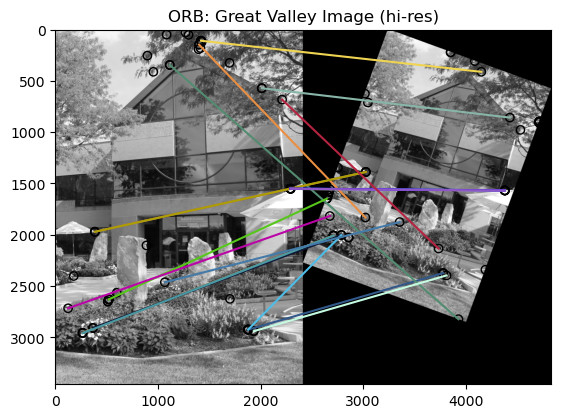

In [11]:
applyORB(gv, gv_t, 'ORB: Great Valley Image (hi-res)')

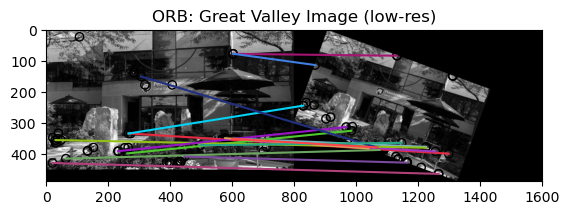

In [12]:
applyORB(gv1_g, gv1_g_t, 'ORB: Great Valley Image (low-res)')

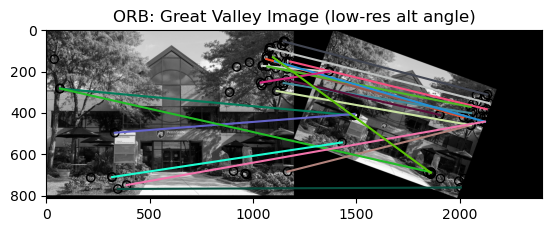

In [13]:
applyORB(gv2_g, gv2_g_t, 'ORB: Great Valley Image (low-res alt angle)')

# SURF seems to be under patent still and I am unable to legally find a library that implements it...

Since SURF is unavailable, I will implement the less optimzed SIFT algorithm instead which left patent in 2020.

In [14]:


# Placeholder for SURF should I find it...

# def applySURF(im1, im2):


The SIFT class and methods do exist to implement as SIFT came out of patent / copyright in 2020.

In [15]:
# Using skimage functions
def applySIFT(im1, im2, every_n_element=30, title=''):
    '''
    Apply the SIFT Feature Extractor to an image and the same image that has been transformed.
    These found points are then matched between the two images and the matches are plotted.

    WARNING: This is crashing my machine for high-resolution images...
    I need to figure out if this is a SIFT issue or a plotting issue.  I have 32 GB of RAM so this shouldn't be a problem... but it is

    Args:
        im1: The first image

        im2: The second image which will be compared to the first.

        every_n_element: Given the many SIFT features that are found, this shows every n'th element

        title: plot title

    Returns:

        None

    '''

    # Change a color image to grayscale
    if len(im1.shape) > 2:
        im1 = ski.color.rgb2gray(im1)
    if len(im2.shape) > 2:
        im2 = ski.color.rgb2gray(im2)

    # Built the descriptor object.
        # This object will do the detecting and extracting of the features
        # The default SIFT parameters need 51GB of RAM to operate on the images.  I am decreasing the number of octaves to run.
    descriptor_extractor_SFIT = ski.feature.SIFT(n_octaves=3, n_scales=2)

    # Find and extract the features for im1
    descriptor_extractor_SFIT.detect_and_extract(im1)
    keypoints_im1 = descriptor_extractor_SFIT.keypoints
    descriptors_im1 = descriptor_extractor_SFIT.descriptors

    # Find and extract the features for im2
    descriptor_extractor_SFIT.detect_and_extract(im2)
    keypoints_im2 = descriptor_extractor_SFIT.keypoints
    descriptors_im2 = descriptor_extractor_SFIT.descriptors

    # Match the descriptors from each image
        # https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.SIFT
        # A descriptor is given by: (N, n_hist*n_hist*n_ori) array

    matches = ski.feature.match_descriptors(descriptors_im1, descriptors_im2, cross_check=True, max_ratio=0.8)

    # Plot the two images with their matched peaks
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plt.gray()
    plt.title(title)
    ski.feature.plot_matches(ax, im1, im2, keypoints_im1, keypoints_im2, matches[::every_n_element], only_matches=True)

I am unable to run the SIFT algorithm on the high-res image without it crashing my computer.  I have commented the block out.

Others may have more success depending on their hardware.

In [16]:
# Don't Run... Crashes computer
# applySIFT(gv, gv_t, 'SIFT: Great Valley Image (high-res)')

Smaller, low-res, images are able to implement SIFT on my machine.

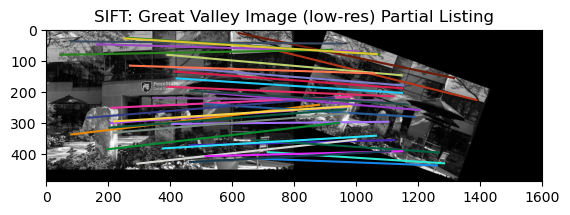

In [17]:
applySIFT(gv1_g, gv1_g_t, title='SIFT: Great Valley Image (low-res) Partial Listing')

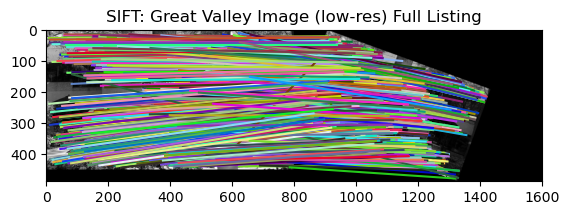

In [18]:
# Plot with every SIFT match
applySIFT(gv1_g, gv1_g_t, every_n_element=1, title='SIFT: Great Valley Image (low-res) Full Listing')

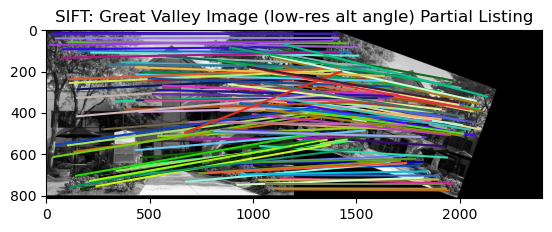

In [19]:
applySIFT(gv2_g, gv2_g_t, title='SIFT: Great Valley Image (low-res alt angle) Partial Listing')

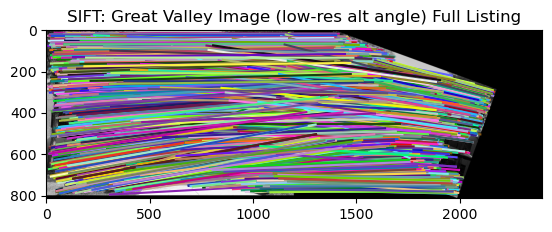

In [20]:
# Plot with every SIFT match
applySIFT(gv2_g, gv2_g_t, every_n_element=1, title='SIFT: Great Valley Image (low-res alt angle) Full Listing')

Comparing the three methods (Harris, ORB, SIFT), the Harris detector ran the fastest, followed by ORB and then SIFT.  It should be noted that SIFT has an absurdly scaling memory requirement in which the high-res Great Valley image required 51GB of RAM for the default parameters of SIFT.

The Harris detector performed relativly well but it did encounter issues in the high-res image when matching the plants at the bottom of the image.  It matched many of the plant points as just the bottom of the image.

ORB performed better than Harris but it still had some missmatches.  There were multiple points where a tree branch covering the roofline was interpreted as being much further down the image in the garden area.

SIFT identifies many, many more feature locations than ORB and Harris.  It also seems to do a much better job matching the origional image to the transformed image.  This greater ability naturally came at the cost of computation.